Data comes from Pensylvania's [Department of Environmental Protection](https://www.dep.pa.gov/DataandTools/Reports/Oil%20and%20Gas%20Reports/pages/default.aspx), specifically their [permits issued database](http://cedatareporting.pa.gov/Reportserver/Pages/ReportViewer.aspx?/Public/DEP/OG/SSRS/Permits_Issued_Detail) for a request from 1969 to 11/23/2021.

# Reading in and cleaning

## Read in the permits database

In [5]:
import pandas as pd
pd.set_option("max_columns", False)
df = pd.read_csv("Permits_Issued_Detail.csv")

## Make sure you can see all of the columns!

I didn't remove extra ones for you this time! It's a trick that involves `pd.set_option`.

In [8]:
df.head()

,REGION,COUNTY,MUNICIPALITY,PERMIT_ISSUED_DATE,OPERATOR,APPLICATION_TYPE,AUTH_TYPE_DESCRIPTION,WELL_API,UNCONVENTIONAL,CONFIGURATION,WELL_TYPE,FARM_NAME,SPUD_DATE,LATITUDE_DEGREES,LONGITUDE_DEGREES,LATITUDE_DECIMAL,LONGITUDE_DECIMAL,OGO_NUM,OPERATOR_ADDRESS,CITY,STATE,ZIP_CODE,AUTHORIZATION_ID,CLIENT_ID,PRMRY_FAC_ID
0,EP DOGO SWDO Dstr Off,Allegheny,Aleppo Twp,2011-03-29,AMER NATURAL RESOURCES LLC,NEW,Drill & Operate Well Permit,003-22174,No,Vertical Well,OIL,MERLE MINICK UNIT 2,04/04/2011,40º 31' 42.97'',-80º 7' 18.74'',40.528603,-80.121872,OGO-38150,PO BOX 306\n520 W PARKWOOD DR\n,RURAL VALLEY,PA,16249-0306,868846,233217,739460
1,EP DOGO SWDO Dstr Off,Allegheny,Aleppo Twp,2011-04-04,AMER NATURAL RESOURCES LLC,NEW,Drill & Operate Well Permit,003-22175,No,Vertical Well,OIL,MERLE MINICK UNIT 1,04/11/2011,40º 32' 0.71'',-80º 7' 22.28'',40.533531,-80.122856,OGO-38150,PO BOX 306\n520 W PARKWOOD DR\n,RURAL VALLEY,PA,16249-0306,869305,233217,739552
2,EP DOGO SWDO Dstr Off,Allegheny,Avalon Boro,1986-09-05,UNKNOWN OPR,NEW,Drill & Operate Well Permit,003-21196,No,Vertical Well,GAS,HARTMAN/BEEDLE 1,01/01/1800,40º 29' 46.23'',-80º 3' 50.059'',40.496175,-80.063905,OGO-99999,UNKNOWN ADDL ADDRESS\n,UNKNOWN,PA,17101,52192,40263,7714
3,EP DOGO SWDO Dstr Off,Allegheny,Bethel Park Boro,1971-09-30,PEOPLES NATURAL GAS CO LLC,NEW,Drill & Operate Well Permit,003-20782,No,Vertical Well,GAS,WALTER PHILIPS ETAL 974,01/31/1914,40º 17' 29.09'',-80º 2' 35.614'',40.291415,-80.043226,OGO-39243,1201 PITT ST\n,PITTSBURGH,PA,15221-2029,51882,189839,7453
4,EP DOGO SWDO Dstr Off,Allegheny,Bethel Park Boro,1976-04-06,PEOPLES NATURAL GAS CO LLC,NEW,Drill & Operate Well Permit,003-20892,No,Vertical Well,GAS,JAS B PHILIPS SR 1165,08/04/1916,40º 17' 31.12'',-80º 2' 39.88'',40.291978,-80.044411,OGO-39243,1201 PITT ST\n,PITTSBURGH,PA,15221-2029,51947,189839,7509


## Speaking of columns, is anything a datetime?

In [9]:
df.dtypes

REGION                    object
COUNTY                    object
MUNICIPALITY              object
PERMIT_ISSUED_DATE        object
OPERATOR                  object
APPLICATION_TYPE          object
AUTH_TYPE_DESCRIPTION     object
WELL_API                  object
UNCONVENTIONAL            object
CONFIGURATION             object
WELL_TYPE                 object
FARM_NAME                 object
SPUD_DATE                 object
LATITUDE_DEGREES          object
LONGITUDE_DEGREES         object
LATITUDE_DECIMAL         float64
LONGITUDE_DECIMAL        float64
OGO_NUM                   object
OPERATOR_ADDRESS          object
CITY                      object
STATE                     object
ZIP_CODE                  object
AUTHORIZATION_ID           int64
CLIENT_ID                  int64
PRMRY_FAC_ID               int64
dtype: object

## I would like the permit issued date to be a datetime

You can do this either right now or through `.read_csv`, either way is fine. It isn't a big dataset, so there's no downside to doing it a slower way!

In [14]:
df['PERMIT_ISSUED_DATE'] = pd.to_datetime(df.PERMIT_ISSUED_DATE, format='%Y-%m-%d', errors='coerce')
df.dtypes

REGION                           object
COUNTY                           object
MUNICIPALITY                     object
PERMIT_ISSUED_DATE       datetime64[ns]
OPERATOR                         object
APPLICATION_TYPE                 object
AUTH_TYPE_DESCRIPTION            object
WELL_API                         object
UNCONVENTIONAL                   object
CONFIGURATION                    object
WELL_TYPE                        object
FARM_NAME                        object
SPUD_DATE                        object
LATITUDE_DEGREES                 object
LONGITUDE_DEGREES                object
LATITUDE_DECIMAL                float64
LONGITUDE_DECIMAL               float64
OGO_NUM                          object
OPERATOR_ADDRESS                 object
CITY                             object
STATE                            object
ZIP_CODE                         object
AUTHORIZATION_ID                  int64
CLIENT_ID                         int64
PRMRY_FAC_ID                      int64


# Looking at issue dates

## When was the earlier permit in this dataset issued?

In [15]:
df.PERMIT_ISSUED_DATE.sort_values()

56672    1969-01-02
136718   1969-01-02
136719   1969-01-02
136715   1969-01-02
136714   1969-01-02
            ...    
64259    2021-11-18
64258    2021-11-18
64256    2021-11-18
64260    2021-11-18
64257    2021-11-18
Name: PERMIT_ISSUED_DATE, Length: 212471, dtype: datetime64[ns]

In [83]:
df[df.PERMIT_ISSUED_DATE == '1969-01-02']

,REGION,COUNTY,MUNICIPALITY,PERMIT_ISSUED_DATE,OPERATOR,APPLICATION_TYPE,AUTH_TYPE_DESCRIPTION,WELL_API,UNCONVENTIONAL,CONFIGURATION,WELL_TYPE,FARM_NAME,SPUD_DATE,LATITUDE_DEGREES,LONGITUDE_DEGREES,LATITUDE_DECIMAL,LONGITUDE_DECIMAL,OGO_NUM,OPERATOR_ADDRESS,CITY,STATE,ZIP_CODE,AUTHORIZATION_ID,CLIENT_ID,PRMRY_FAC_ID
56672,EP DOGO SWDO Dstr Off,Fayette,Wharton Twp,1969-01-02,DIVERSIFIED PROD LLC,NEW,Drill & Operate Well Permit,051-20092,No,Vertical Well,GAS,ARMSTRONG HEIRS (ARMSTRONG-WHITE UNI 1,08/09/1968,39º 44' 0.8'',-79º 38' 13.2'',39.733556,-79.637,OGO-65675,4150 BELDEN VILLAGE ST NW STE 410\n,CANTON,OH,44718-2553,100053,244896,42742
136712,EP DOGO NCDO Dstr Off,Potter,Oswayo Twp,1969-01-02,NATL FUEL GAS SUPPLY CORP,NEW,Drill & Operate Well Permit,105-20261,No,Vertical Well,GAS,GEORGE BALL 6023,01/01/1800,NaN,NaN,NaN,NaN,OGO-8809,6363 MAIN ST\n,WILLIAMSVILLE,NY,14221-5887,183352,74892,174770
136713,EP DOGO NCDO Dstr Off,Potter,Oswayo Twp,1969-01-02,NATL FUEL GAS SUPPLY CORP,NEW,Drill & Operate Well Permit,105-20262,No,Vertical Well,GAS,UNITED NATURAL GAS CO (FLY L G PERKI 6044,01/01/1800,NaN,NaN,NaN,NaN,OGO-8809,6363 MAIN ST\n,WILLIAMSVILLE,NY,14221-5887,183353,74892,174771
136714,EP DOGO NCDO Dstr Off,Potter,Oswayo Twp,1969-01-02,NATL FUEL GAS SUPPLY CORP,NEW,Drill & Operate Well Permit,105-20263,No,Vertical Well,GAS,UNITED NATURAL GAS CO (FLY EMPIRE GA 6070,01/01/1800,NaN,NaN,NaN,NaN,OGO-8809,6363 MAIN ST\n,WILLIAMSVILLE,NY,14221-5887,183354,74892,174772
136715,EP DOGO NCDO Dstr Off,Potter,Oswayo Twp,1969-01-02,NATL FUEL GAS SUPPLY CORP,NEW,Drill & Operate Well Permit,105-20264,No,Vertical Well,GAS,UNITED NATURAL GAS CO (FLY EMPIRE GA 6026,01/01/1800,NaN,NaN,NaN,NaN,OGO-8809,6363 MAIN ST\n,WILLIAMSVILLE,NY,14221-5887,183355,74892,174773
136716,EP DOGO NCDO Dstr Off,Potter,Oswayo Twp,1969-01-02,NATL FUEL GAS SUPPLY CORP,NEW,Drill & Operate Well Permit,105-20265,No,Vertical Well,GAS,UNITED NATURAL GAS CO (FLY EMPIRE GA 6050,01/01/1800,NaN,NaN,NaN,NaN,OGO-8809,6363 MAIN ST\n,WILLIAMSVILLE,NY,14221-5887,183356,74892,174774
136717,EP DOGO NCDO Dstr Off,Potter,Oswayo Twp,1969-01-02,NATL FUEL GAS SUPPLY CORP,NEW,Drill & Operate Well Permit,105-20266,No,Vertical Well,GAS,UNITED NATURAL GAS CO(FLY EMPIRE GAS 6055,01/01/1800,NaN,NaN,NaN,NaN,OGO-8809,6363 MAIN ST\n,WILLIAMSVILLE,NY,14221-5887,183357,74892,174775
136718,EP DOGO NCDO Dstr Off,Potter,Oswayo Twp,1969-01-02,NATL FUEL GAS SUPPLY CORP,NEW,Drill & Operate Well Permit,105-20267,No,Vertical Well,GAS,UNITED NATURAL GAS CO(FLY EMPIRE GAS 6043,01/01/1800,NaN,NaN,NaN,NaN,OGO-8809,6363 MAIN ST\n,WILLIAMSVILLE,NY,14221-5887,183358,74892,174776
136719,EP DOGO NCDO Dstr Off,Potter,Oswayo Twp,1969-01-02,NATL FUEL GAS SUPPLY CORP,NEW,Drill & Operate Well Permit,105-20268,No,Vertical Well,GAS,UNITED NATURAL GAS CO(FLY EMPIRE GAS 6072,01/01/1800,NaN,NaN,NaN,NaN,OGO-8809,6363 MAIN ST\n,WILLIAMSVILLE,NY,14221-5887,183359,74892,174777
136741,EP DOGO NCDO Dstr Off,Potter,Oswayo Twp,1969-01-02,UNITED PETRO CORP,NEW,Drill & Operate Well Permit,105-20260,No,Vertical Well,GAS,R C HOLMES 6150,01/01/1800,NaN,NaN,NaN,NaN,OGO-19771,6230 BUSCH BLVD\n,COLUMBUS,OH,43229-1826,183351,2802,174769


## What year has the most permits issued?

I wouldn't expect this to be seasonal, but who knows - it gets pretty cold in Pennsylvania in the winter, so maybe everyone just sleeps all the time?

In [16]:
df.PERMIT_ISSUED_DATE.dt.year.value_counts()

1984    13827
1981     9483
1982     9266
1983     8003
2008     7974
1985     7839
1980     7618
2006     7345
2007     7299
2010     6597
2009     6241
2005     6045
2011     5745
1978     5178
1979     4991
2013     4612
2004     4602
2014     4451
2012     4217
1976     3881
2003     3830
1977     3828
1973     3669
1986     3483
1972     3384
1975     3354
1974     3272
2002     3193
2001     3011
1969     2781
1970     2756
1971     2642
2015     2525
1987     2452
2000     2290
2017     2225
2018     2149
1988     2085
1991     2003
1990     1993
1998     1988
1999     1981
1997     1878
1996     1820
1989     1797
2019     1705
1992     1677
1994     1658
2016     1482
1993     1221
1995     1207
2020     1020
2021      898
Name: PERMIT_ISSUED_DATE, dtype: int64

## **Graph permits issued by month**

Make sure the x axis is in the right order!

<AxesSubplot:>

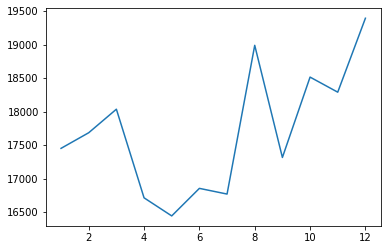

In [84]:
df.PERMIT_ISSUED_DATE.dt.month.value_counts().sort_index().plot()

## What's the difference between doing `.plot()` and `.plot(kind='bar')`? Which one do you feel is a better representation of the data?

<AxesSubplot:>

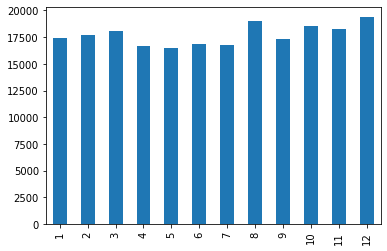

In [85]:
df.PERMIT_ISSUED_DATE.dt.month.value_counts().sort_index().plot(kind='bar')
#The default .plot() will return the line chart. .plot(kind='bar') will return a bar chart.
#I think in this case, bar chart makes more sense. Because it's not a change over time since we've grouped the data by month.

### Bonus trick: axis labeling

**If you want to make your graphs look a little nicer, you can use some manual effort and make it happen!** In matplotlib, `.set_xticks` will show what tick marks to put on the bottom axis, and `set_xticklabels` will give them names. So for example, the code below will plot January, June and December on your graph.

```python
ax = df......plot()
ax.set_xticks([1, 6, 12])
ax.set_xticklabels(['Jan', 'June', 'Dec'])
```

Compare the results for `.plot()` vs `.plot(kind='bar')`. In theory the difference makes sense because bar plots are for categorical data, but speaking honestly: _matplotlib is a nightmare._

[Text(1, 0, 'Jan'), Text(6, 0, 'June'), Text(12, 0, 'Dec')]

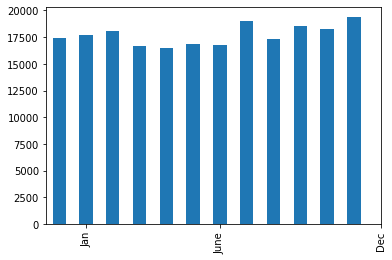

In [86]:
ax = df.PERMIT_ISSUED_DATE.dt.month.value_counts().sort_index().plot(kind='bar')
ax.set_xticks([1, 6, 12])
ax.set_xticklabels(['Jan', 'June', 'Dec'])

# Permits over time

## Graph permits issued by week (W), month (M) and quarter (Q)

Which is the best representation of the trend in issued permits?

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE'>

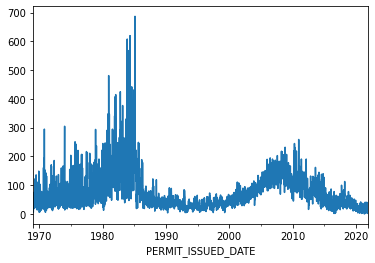

In [27]:
df.resample('W', on='PERMIT_ISSUED_DATE').size().sort_index().plot()
#This one is not clear.

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE'>

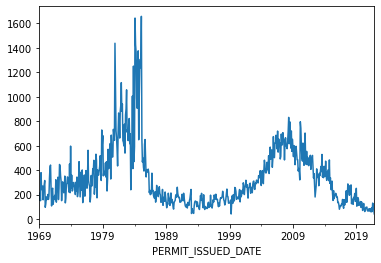

In [28]:
df.resample('M', on='PERMIT_ISSUED_DATE').size().sort_index().plot()
#I think this one is the best because it's both clear and informative.

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE'>

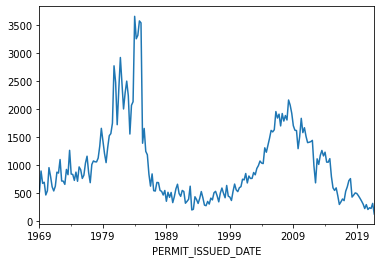

In [29]:
df.resample('Q', on='PERMIT_ISSUED_DATE').size().sort_index().plot()
#This one is clear but doesn't give enough information.

## What month had the fewest permits issued?

In [30]:
df.PERMIT_ISSUED_DATE.dt.month.value_counts()

12    19394
8     18990
10    18516
11    18291
3     18037
2     17686
1     17453
9     17317
6     16856
7     16771
4     16715
5     16445
Name: PERMIT_ISSUED_DATE, dtype: int64

## What year had the most permits issued?

In [31]:
df.PERMIT_ISSUED_DATE.dt.year.value_counts()

1984    13827
1981     9483
1982     9266
1983     8003
2008     7974
1985     7839
1980     7618
2006     7345
2007     7299
2010     6597
2009     6241
2005     6045
2011     5745
1978     5178
1979     4991
2013     4612
2004     4602
2014     4451
2012     4217
1976     3881
2003     3830
1977     3828
1973     3669
1986     3483
1972     3384
1975     3354
1974     3272
2002     3193
2001     3011
1969     2781
1970     2756
1971     2642
2015     2525
1987     2452
2000     2290
2017     2225
2018     2149
1988     2085
1991     2003
1990     1993
1998     1988
1999     1981
1997     1878
1996     1820
1989     1797
2019     1705
1992     1677
1994     1658
2016     1482
1993     1221
1995     1207
2020     1020
2021      898
Name: PERMIT_ISSUED_DATE, dtype: int64

**Why so many in the early 80's?** There was money to be made! But [then it all came crashing down](https://en.wikipedia.org/wiki/1980s_oil_glut).

If we were historians or economists this dataset could be a lot more fun.

# Application Types

## What are the different application types?

There are three types of applications: new, renewals, and modifications. How many of each type are in this dataset?

In [33]:
df.APPLICATION_TYPE.value_counts()

NEW    202528
REN      8165
MOD      1778
Name: APPLICATION_TYPE, dtype: int64

## How many of each application type were granted in each month?

I don't know if we've ever done this! But think about it: 

1. You want to put them into groups based on their month. What's the `groupby` equivalent for time?
2. You want to count the number of applications types, just like you did in the cell above.

The result should look something like this:

```
PERMIT_ISSUED_DATE  APPLICATION_TYPE
2000-11-30          NEW                 157
                    REN                   7
2000-12-31          NEW                 194
                    REN                   8
2001-01-31          NEW                 228
                                       ... 
2021-10-31          MOD                  18
                    REN                   7
2021-11-30          NEW                  35
                    MOD                   6
                    REN                   2
```

In [41]:
df.resample('M', on='PERMIT_ISSUED_DATE').APPLICATION_TYPE.value_counts()

PERMIT_ISSUED_DATE  APPLICATION_TYPE
1969-01-31          NEW                 156
1969-02-28          NEW                 215
1969-03-31          NEW                 151
1969-04-30          NEW                 380
1969-05-31          NEW                 242
                                       ... 
2021-10-31          MOD                  18
                    REN                   7
2021-11-30          NEW                  35
                    MOD                   6
                    REN                   2
Name: APPLICATION_TYPE, Length: 1055, dtype: int64

### Converting into a dataframe

If we wanted to plot how new vs renewals vs modifications changed over time, we can't just do `.plot()`. I mean, try it, see what happens!

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE,APPLICATION_TYPE'>

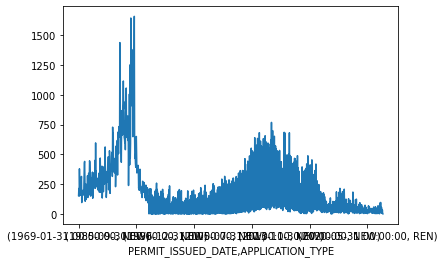

In [42]:
df.resample('M', on='PERMIT_ISSUED_DATE').APPLICATION_TYPE.value_counts().plot()

**It's awful.** But here's what you can do to switch the month-category groups into something nice: remove the `.plot()`, toss an `.unstack()` on the end, and you'll end up with something like this:

|APPLICATION_TYPE|MOD|NEW|REN|
|---|---|---|---|
|**PERMIT_ISSUED_DATE**|||||
|2000-11-30|NaN|157.0|7.0|
|2000-12-31|NaN|194.0|8.0|
|...|...|...|...|

In [43]:
df.resample('M', on='PERMIT_ISSUED_DATE').APPLICATION_TYPE.value_counts().unstack()

APPLICATION_TYPE,MOD,NEW,REN
PERMIT_ISSUED_DATE,,,
1969-01-31,NaN,156.0,NaN
1969-02-28,NaN,215.0,NaN
1969-03-31,NaN,151.0,NaN
1969-04-30,NaN,380.0,NaN
1969-05-31,NaN,242.0,NaN
...,...,...,...
2021-07-31,3.0,45.0,14.0
2021-08-31,17.0,92.0,22.0
2021-09-30,12.0,98.0,11.0


Nice, right? But even nicer: put a `.plot()` after it.

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE'>

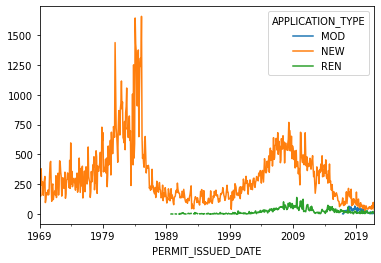

In [44]:
df.resample('M', on='PERMIT_ISSUED_DATE').APPLICATION_TYPE.value_counts().unstack().plot()

**Incredible!** This happens because it plots **each column as its own line.** Three columns, three lines!

The practice of moving your data around to get it into the format you want is called **reshaping**, and it's pretty common requirement when you're trying to get a particular kind of graph. You can [watch a YouTube video I made about the topic](https://www.youtube.com/watch?v=O4538i9MQEc) if you'd like to learn more.

## When was the first `MOD` permit issued?

They seem to not exist in the database initially, but showed up at some point later. How can we calculate this? There are a few different methods: some involving filtering, some involving groupby, some involving sorting, some involving `.min()`...

In [48]:
#Method1
df[df.APPLICATION_TYPE == 'MOD'].PERMIT_ISSUED_DATE.sort_values()

18228    2016-11-04
141372   2016-11-15
20188    2016-11-23
18230    2016-12-20
142922   2017-01-13
            ...    
198319   2021-11-10
139753   2021-11-15
25073    2021-11-15
25074    2021-11-15
25075    2021-11-15
Name: PERMIT_ISSUED_DATE, Length: 1778, dtype: datetime64[ns]

In [52]:
#Method2
df[df.APPLICATION_TYPE == 'MOD'].PERMIT_ISSUED_DATE.min()

Timestamp('2016-11-04 00:00:00')

In [53]:
#Method3
df.groupby(by = 'APPLICATION_TYPE').PERMIT_ISSUED_DATE.min()

APPLICATION_TYPE
MOD   2016-11-04
NEW   1969-01-02
REN   1989-04-24
Name: PERMIT_ISSUED_DATE, dtype: datetime64[ns]

## What are the top five counties for granting new permits?

In [70]:
df[df.APPLICATION_TYPE == 'NEW'].COUNTY.value_counts().head()

McKean     32217
Warren     25840
Venango    24904
Indiana    14241
Forest     10584
Name: COUNTY, dtype: int64

## Create a new dataframe called new_top5 that is only new applications from those five counties

In [80]:
new_top5 = df[df.APPLICATION_TYPE.isin(['NEW']) & df.COUNTY.isin(['McKean', 'Warren', 'Venango', 'Indiana', 'Forest'])]

### Confirm your new dataframe has 80667 rows

In [81]:
new_top5.shape

(107786, 25)

## Plot the number of permits each year. Each county should have its own line.

It should look like this:

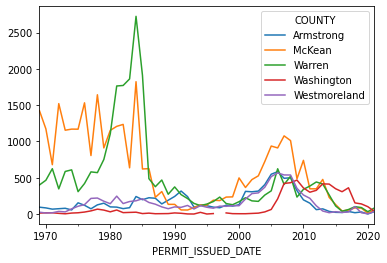

You'll want to do roughly the same thing you did for applications up above:

1. Put them in groups based on their year
2. See how many times each county exists for that year
3. `.unstack().plot()`

Before you plot, you should have a dataframe where **years are rows and counties are columns.** If you have a bazillion lines it's because you're using your original dataframe instead of the new top 5 one.

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE'>

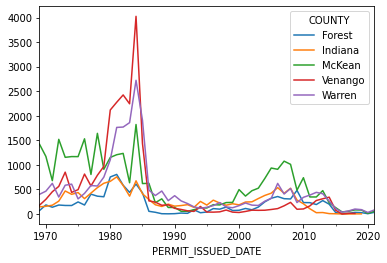

In [111]:
#Method 1
new_top5.resample('Y', on='PERMIT_ISSUED_DATE').COUNTY.value_counts().unstack().plot()

<AxesSubplot:xlabel='PERMIT_ISSUED_DATE'>

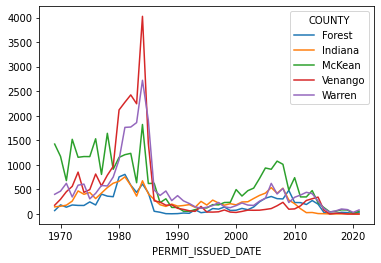

In [115]:
#Method 2
pd.crosstab(new_top5.PERMIT_ISSUED_DATE.dt.year, new_top5.COUNTY).plot()

## The mid-80s hit Warren County especially hard! What was the percentage drop in new permits 1985 and 1986?

### Step one: Calculating

For the code, just put `.pct_change()` on your county-vs-date dataframe, it'll calculate the percentage change between the columns of each row and the row below it. It shoudl look like this:

|COUNTY|Armstrong|McKean|Warren|Washington|Westmoreland|
|---|---|---|---|---|---|
|**PERMIT_ISSUED_DATE**|||||
|1969-12-31|NaN	|NaN|NaN|NaN|NaN|
|1970-12-31|-0.105263|-0.176264|0.162095|0.214286|-0.423077|
|1971-12-31|-0.200000|-0.420290|0.341202|0.058824|0.200000|

In [130]:
new_top5.resample('Y', on='PERMIT_ISSUED_DATE').COUNTY.value_counts().unstack().pct_change()

COUNTY,Forest,Indiana,McKean,Venango,Warren
PERMIT_ISSUED_DATE,,,,,
1969-12-31,NaN,NaN,NaN,NaN,NaN
1970-12-31,1.657143,0.082192,-0.176264,0.675978,0.162095
1971-12-31,-0.252688,0.139241,-0.420290,0.513333,0.341202
1972-12-31,0.323741,0.461111,1.236765,0.240088,-0.444800
1973-12-31,-0.048913,0.787072,-0.240631,0.515098,0.691643
1974-12-31,-0.005714,-0.144681,0.012987,-0.483001,0.037479
1975-12-31,0.419540,0.089552,-0.000855,0.126984,-0.492611
1976-12-31,-0.255061,-0.283105,0.310522,0.637827,0.362460
1977-12-31,1.201087,0.359873,-0.473890,-0.296069,0.380048


In [122]:
pd.crosstab(new_top5.PERMIT_ISSUED_DATE.dt.year, new_top5.COUNTY).pct_change()

COUNTY,Forest,Indiana,McKean,Venango,Warren
PERMIT_ISSUED_DATE,,,,,
1969,NaN,NaN,NaN,NaN,NaN
1970,1.657143,0.082192,-0.176264,0.675978,0.162095
1971,-0.252688,0.139241,-0.420290,0.513333,0.341202
1972,0.323741,0.461111,1.236765,0.240088,-0.444800
1973,-0.048913,0.787072,-0.240631,0.515098,0.691643
1974,-0.005714,-0.144681,0.012987,-0.483001,0.037479
1975,0.419540,0.089552,-0.000855,0.126984,-0.492611
1976,-0.255061,-0.283105,0.310522,0.637827,0.362460
1977,1.201087,0.359873,-0.473890,-0.296069,0.380048


### Step two: Writing

But can you turn it into a sentence? Something like...

> after an increase in permits of [blank] percent just two years prior, 1986 saw Warren's new permits plummet a staggering [blank] percent

In [150]:
#After increasing for six years from 1979, Warren's new permits experienced a plummet at 30% in 1985 and 74% in 1986 respectively.
#While it slightly rised in 1988 and 1990, it was until 1995 when Warren county finally saw a continous increase in new permits.


# Now let's relax a little bit

## Does the government issue permits on the weekends?

To answer this question, calculate the percent of permits are issued on Saturday and Sunday. We know how to get the month and the year and the day of the month from a datetime, but how do you get the day of the week..?

In [146]:
#The day of the week with Monday=0, Sunday=6.
df.PERMIT_ISSUED_DATE.dt.dayofweek.value_counts()

2    45685
1    43735
3    42451
4    40382
0    38385
5     1203
6      630
Name: PERMIT_ISSUED_DATE, dtype: int64

In [148]:
df.PERMIT_ISSUED_DATE.dt.strftime("%A").value_counts()

Wednesday    45685
Tuesday      43735
Thursday     42451
Friday       40382
Monday       38385
Saturday      1203
Sunday         630
Name: PERMIT_ISSUED_DATE, dtype: int64